# **OpenStreetMap data**

## goals of the tutorial
- understand openstreetmap
- understand the openstreetmap data model
- manage openstreetmap data in geopandas

**based on the open data of:**
- [openstreetmap](https://wiki.openstreetmap.org/wiki/Map_Features)


### requirements
- python knowledge
- geopandas
- gis concepts

**status**

*OpenStreetMap is made by people like you!!!*

---

## Setup

In [1]:
try:
  import pyrosm
except ModuleNotFoundError as e:
  !pip install pyrosm==0.6.2
  import pyrosm

In [401]:
try:
  import mapclassify
except ModuleNotFoundError as e:
  !pip install mapclassify==2.6.1
  import mapclassify

if mapclassify.__version__ != "2.6.1":
  !pip install -U mapclassify==2.6.1

In [402]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.14.4
  import geopandas as gpd

if gpd.__version__ != "0.14.4":
  !pip install -U geopandas==0.14.4
  import geopandas as gpd

In [403]:
import geopandas as gpd
from matplotlib import pyplot as plt

# OpenStreetMap: an ecosystem of innovation

## RAW Data
OSM XML
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osmdata1.png)

## OverPass API
![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/overpassturbo.png)


* [http://overpass-turbo.eu/](http://overpass-turbo.eu/)
* [https://overpass-ultra.trailsta.sh/](https://overpass-ultra.trailsta.sh/)

## Protocol Buffer
[https://developers.google.com/protocol-buffers](https://developers.google.com/protocol-buffers )

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/pbf.png)


* [planet](https://planet.openstreetmap.org/)
* [geofabrik](https://download.geofabrik.de)
* [estratti osm italia](https://osmit-estratti.wmcloud.org/)

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/export_hotosm.png)


[https://export.hotosm.org/v3/exports/f661ba45-c26b-4b93-a8de-2ec576ade760](https://export.hotosm.org/v3/exports/f661ba45-c26b-4b93-a8de-2ec576ade760)

for the italian regions, provinces and cities you can use the service made by Wikimedia Italia 

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/osm_estratti.png)

[https://osmit-estratti.wmcloud.org/](https://osmit-estratti.wmcloud.org/)

Eg.
[L'Aquila](https://osmit-estratti.wmcloud.org/output/pbf/comuni/066049_L'Aquila.osm.pbf)

In [3]:
import pyrosm
import os 
import requests
import matplotlib.pyplot as plt
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
laquila_download_pbf_url = "https://osmit-estratti.wmcloud.org/output/pbf/comuni/066049_L'Aquila.osm.pbf"
# download the data
import requests
#request the file
r = requests.get(laquila_download_pbf_url, allow_redirects=True)
#save the file
open('laquila.pbf', 'wb').write(r.content)

4065526

In [5]:
osm = pyrosm.OSM("laquila.pbf")

In [6]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [7]:
osm.conf.tags.amenity

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'visible',
 'website',
 'yes',
 'amenity',
 'arts_centre',
 'atm',
 'bank',
 'bicycle_parking',
 'bicycle_rental',
 'bicycle_repair_station',
 'bar',
 'bbq',
 'biergarten',
 'brothel',
 'building',
 'building:levels',
 'bureau_de_change',
 'bus_station',
 'bus_stop',
 'cafe',
 'car_rental',
 'car_repair',
 'car_sharing',
 'car_wash',
 'casino',
 'charging_station',
 'childcare',
 'cinema',
 'clinic',
 'college',
 'dentist',
 'doctors',
 'driving_school',
 'drinking_water',
 'fast_food',
 'ferry_terminal',
 'fire_station',
 'food_court',
 'fountain',
 'fuel',
 'gambling',
 'hospital',
 'ice_cream',
 'internet_access',
 'kindergarten',
 'landuse',
 'language_school',
 'library',
 'music_school',
 'nightclub',
 'nursing_home',
 'office',
 'operator',
 'parking',
 'pharmasy',
 'plan

CPU times: user 2 µs, sys: 3 µs, total: 5 µs
Wall time: 9.54 µs


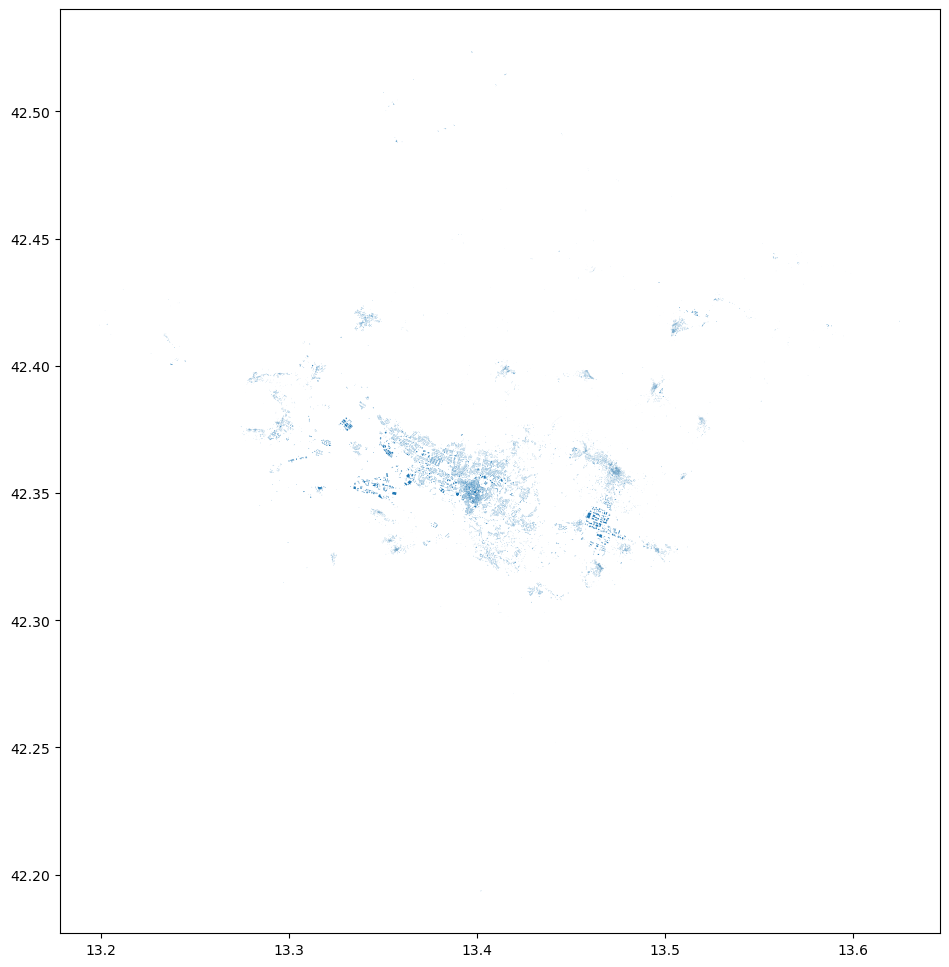

In [8]:
%time
buildings = osm.get_buildings()
buildings.plot(figsize=(12,12))
plt.show()

In [9]:
buildings.head(4)

,addr:city,addr:country,addr:housenumber,addr:postcode,addr:place,addr:street,email,name,opening_hours,operator,...,source,start_date,wikipedia,id,timestamp,version,tags,osm_type,geometry,changeset
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,62172751,1534563976,3,None,way,"POLYGON ((13.35062 42.35131, 13.35022 42.35132...",NaN
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,62172767,1276865339,1,None,way,"POLYGON ((13.35320 42.35264, 13.35329 42.35287...",NaN
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,62172770,1534563976,3,None,way,"POLYGON ((13.35023 42.35238, 13.35061 42.35208...",NaN
3,None,None,None,None,None,None,None,Centro Commerciale Meridiana,None,None,...,None,None,None,62193588,1424401020,4,"{""wheelchair"":""yes""}",way,"POLYGON ((13.38552 42.35547, 13.38568 42.35542...",NaN


CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


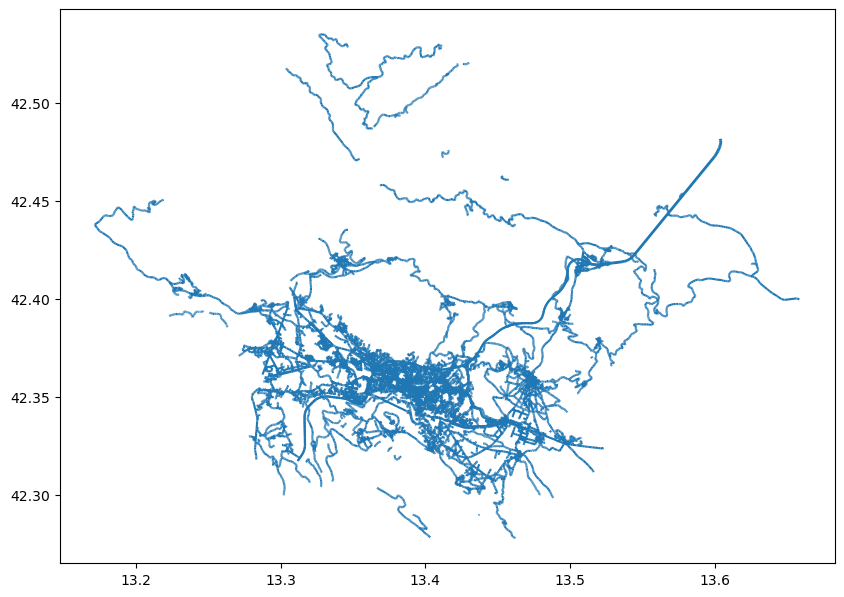

In [10]:
%time
drive_net = osm.get_network(network_type="driving")
drive_net.plot(figsize=(10,10))
plt.show()

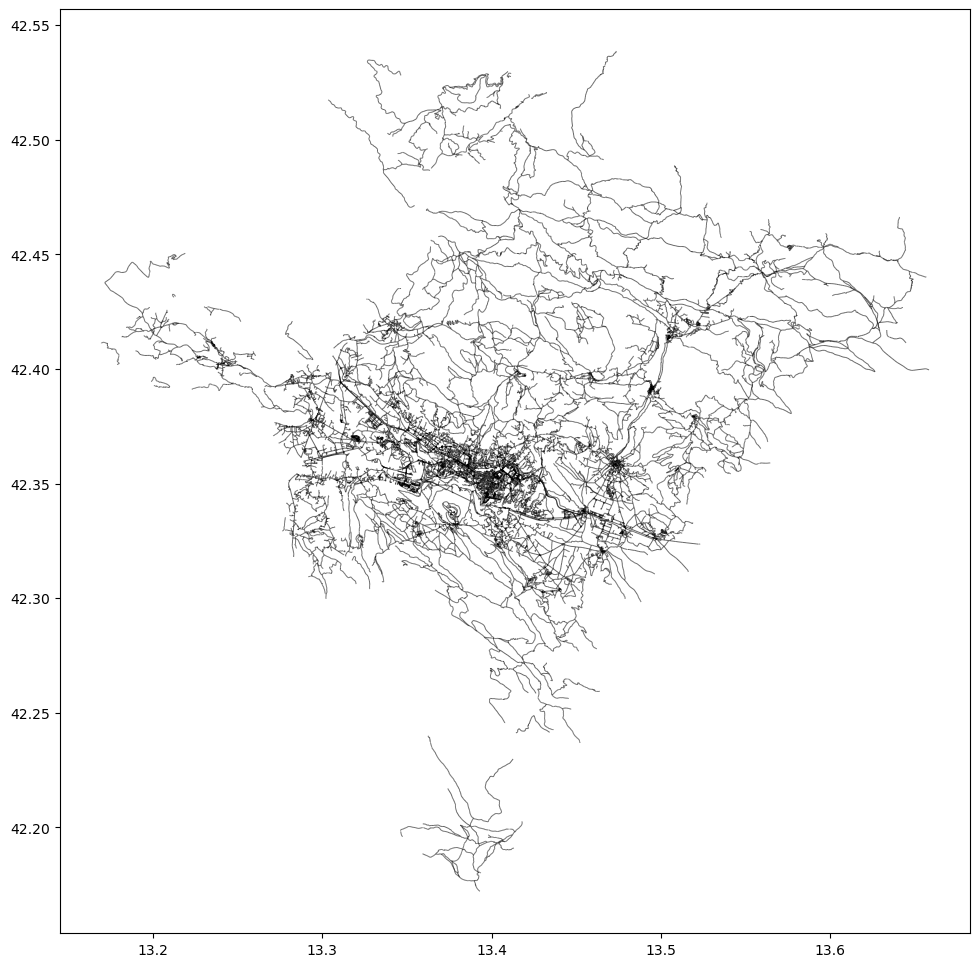

In [11]:
walk = osm.get_network("walking")
walk.plot(color="k", figsize=(12,12), lw=0.7, alpha=0.6)
plt.show()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.39 µs


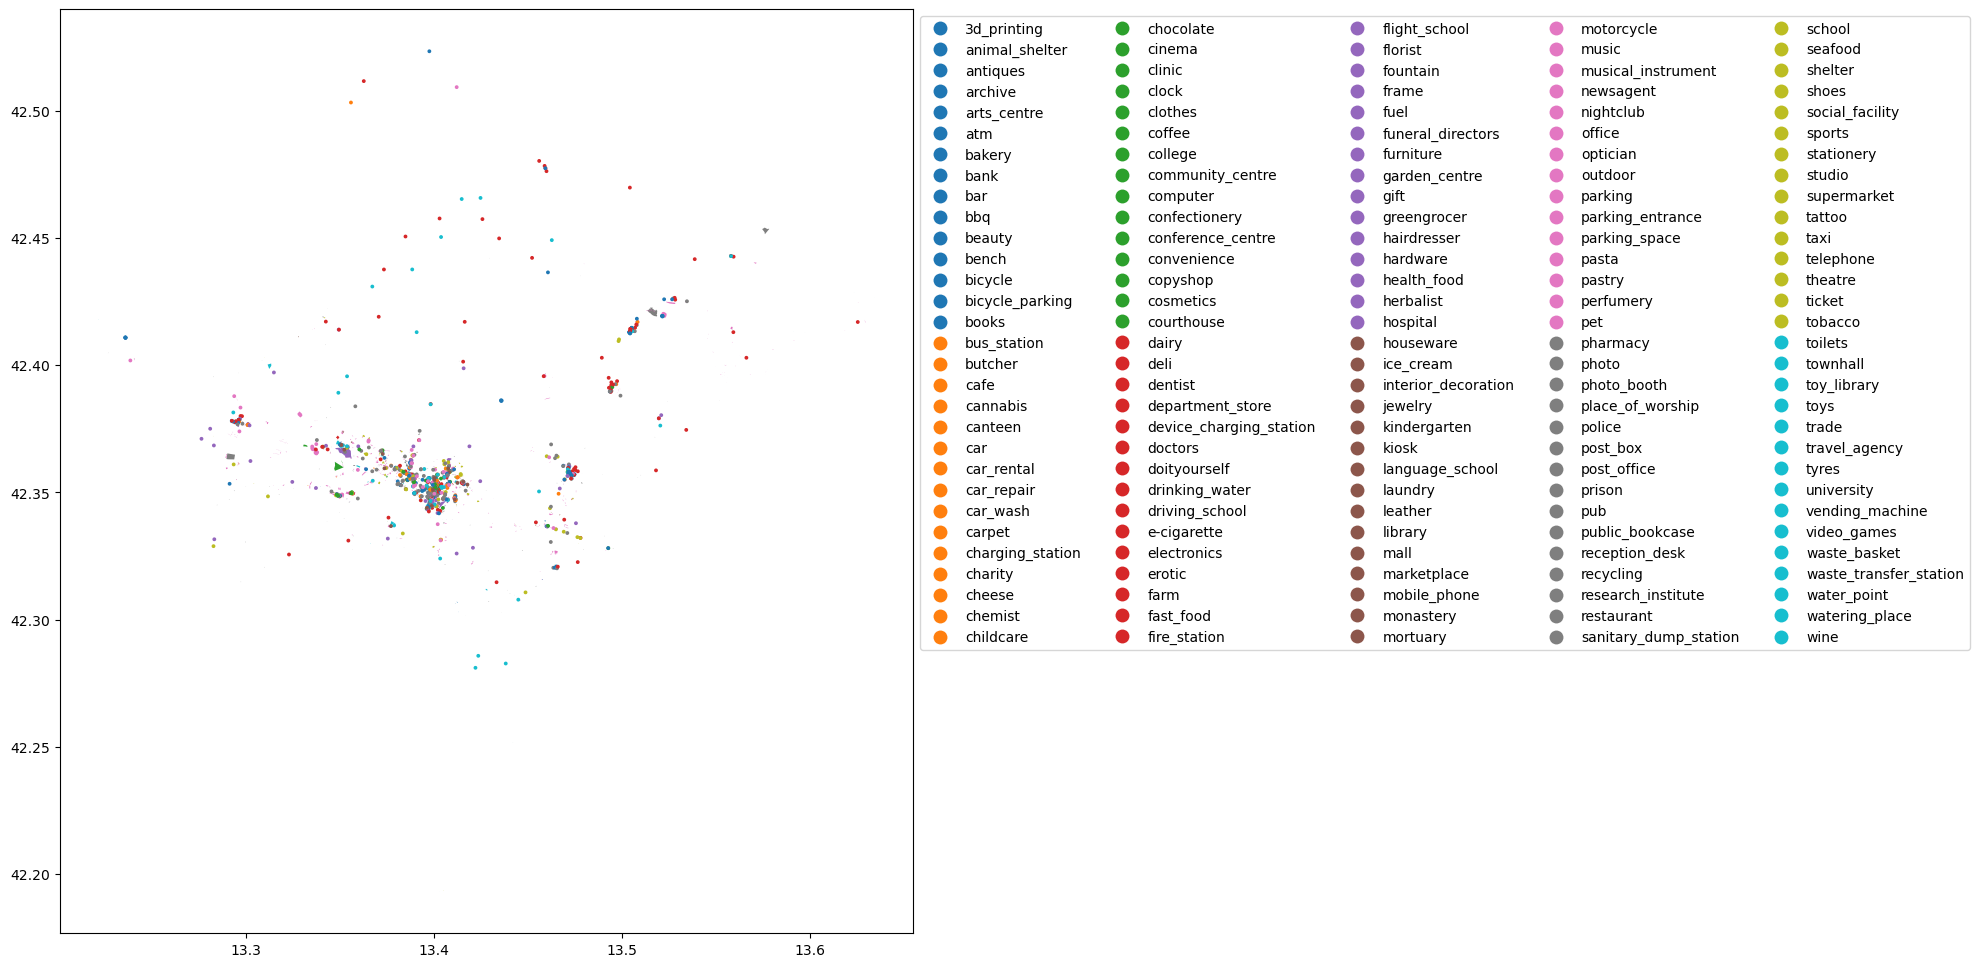

In [12]:
%time
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))
plt.show()

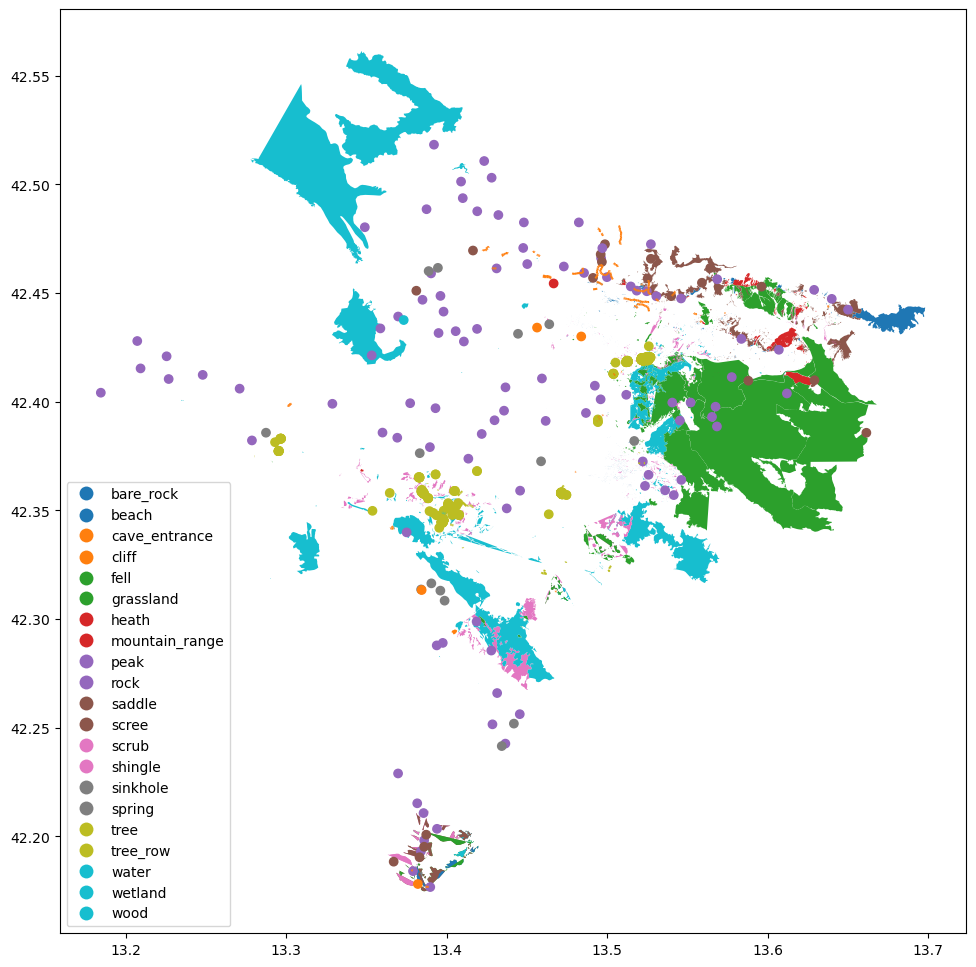

In [13]:
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(12,12))
plt.show()